In [2]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime
import numpy as np
from netCDF4 import Dataset
import time
import seaborn as sns

import xarray as xr
import pandas as pd

/sw/tools/anaconda3/2019.10/skl/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
poc_z = pd.read_csv('poc_zemlya_monthly.csv', index_col='time', parse_dates=True)
doc_z = pd.read_csv('doc_zemlya_monthly.csv', index_col='time', parse_dates=True)
poc_a = pd.read_csv('poc_stanna_monthly.csv', index_col='time', parse_dates=True)
doc_a = pd.read_csv('doc_stanna_monthly.csv', index_col='time', parse_dates=True)
poc_f = pd.read_csv('poc_franzjoseph_monthly.csv', index_col='time', parse_dates=True)
doc_f = pd.read_csv('doc_franzjoseph_monthly.csv', index_col='time', parse_dates=True)

poc_z_yr = pd.read_csv('poc_zemlya_yearlymean.csv', index_col='time', parse_dates=True)
doc_z_yr = pd.read_csv('doc_zemlya_yearlymean.csv', index_col='time', parse_dates=True)
poc_a_yr = pd.read_csv('poc_stanna_yearlymean.csv', index_col='time', parse_dates=True)
doc_a_yr = pd.read_csv('doc_stanna_yearlymean.csv', index_col='time', parse_dates=True)
poc_f_yr = pd.read_csv('poc_franzjoseph_yearlymean.csv', index_col='time', parse_dates=True)
doc_f_yr = pd.read_csv('doc_franzjoseph_yearlymean.csv', index_col='time', parse_dates=True)

poc_z_yr_int = pd.read_csv('poc_zemlya_yearlyintegral.csv', index_col='time', parse_dates=True)
doc_z_yr_int = pd.read_csv('doc_zemlya_yearlyintegral.csv', index_col='time', parse_dates=True)
poc_a_yr_int = pd.read_csv('poc_stanna_yearlyintegral.csv', index_col='time', parse_dates=True)
doc_a_yr_int = pd.read_csv('doc_stanna_yearlyintegral.csv', index_col='time', parse_dates=True)
poc_f_yr_int = pd.read_csv('poc_franzjoseph_yearlyintegral.csv', index_col='time', parse_dates=True)
doc_f_yr_int = pd.read_csv('doc_franzjoseph_yearlyintegral.csv', index_col='time', parse_dates=True)

Text(-0.18, 1.02, 'c')

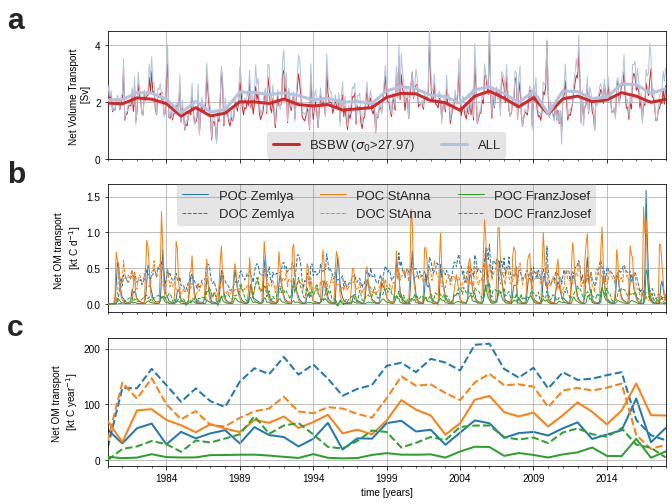

In [5]:
figsize = (10, 8)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize, constrained_layout=False, sharex=True)
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')

doc_a['StAnna_VOL_transport_bsbw_Sv'].plot(kind = 'line',style='-',markersize = 10, lw = 1, ax = ax1, legend = False, color = 'tab:red', zorder =3, label='_Hidden label')
doc_a['StAnna_VOL_transport_Sv'].plot(kind = 'line',style='-',markersize = 10, lw = 1, ax = ax1, legend = False, color = 'lightsteelblue', zorder =3, label='_Hidden label')
doc_a_yr['StAnna_VOL_transport_bsbw_Sv'].plot(kind = 'line',style='-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:red', zorder =3,label='BSBW ($\sigma_0$>27.97)')
doc_a_yr['StAnna_VOL_transport_Sv'].plot(kind = 'line',style='-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'lightsteelblue', zorder =3,label='ALL')
lgd1 = ax1.legend(ncol=2, borderaxespad=0.,facecolor="gray",frameon=True, framealpha=0.2)  
lgd1.get_frame().set_facecolor("gray")
ax1.set_ylim(0, 4.5)
ax1.set_ylabel('Net Volume Transport \n [Sv]')

poc_z['Zemlya_POC_transport_bsbw_ktC_d'].plot(kind = 'line',style='-',markersize = 10, lw = 1, ax = ax2, legend = False, color = 'C0', zorder =1,label='POC Zemlya')
doc_z['Zemlya_DOC_transport_bsbw_ktC_d'].plot(kind = 'line',style='--',markersize = 10, lw = 1, ax = ax2, legend = False, color = 'C0', zorder =2,label='DOC Zemlya')
poc_a['StAnna_POC_transport_bsbw_ktC_d'].plot(kind = 'line',style='-',markersize = 10, lw = 1, ax = ax2, legend = False, color = 'C1', zorder =3,label='POC StAnna')
doc_a['StAnna_DOC_transport_bsbw_ktC_d'].plot(kind = 'line',style='--',markersize = 10, lw = 1, ax = ax2, legend = False, color = 'C1', zorder =3,label='DOC StAnna')
poc_f['FranzJoseph_POC_transport_bsbw_ktC_d'].plot(kind = 'line',style='-',markersize = 10, lw = 1, ax = ax2, legend = False, color = 'C2', zorder =3,label='POC FranzJosef')
doc_f['FranzJoseph_DOC_transport_bsbw_ktC_d'].plot(kind = 'line',style='--',markersize = 10, lw = 1, ax = ax2, legend = False, color = 'C2', zorder =3,label='DOC FranzJosef')
ax2.legend(ncol=3, borderaxespad=0.,facecolor="gray",frameon=True, framealpha=0.2)#, mode="expand"
ax2.set_ylabel('Net OM transport \n [kt C d$^{-1}$]')

poc_z_yr_int['Zemlya_POC_transport_bsbw_ktC_d'].plot(kind = 'line',style='-',markersize = 10, lw = 2, ax = ax3, legend = False, color = 'C0', zorder =1,label='POC Zemlya')
doc_z_yr_int['Zemlya_DOC_transport_bsbw_ktC_d'].plot(kind = 'line',style='--',markersize = 10, lw = 2, ax = ax3, legend = False, color = 'C0', zorder =2,label='DOC Zemlya')
poc_a_yr_int['StAnna_POC_transport_bsbw_ktC_d'].plot(kind = 'line',style='-',markersize = 10, lw = 2, ax = ax3, legend = False, color = 'C1', zorder =3,label='POC StAnna')
doc_a_yr_int['StAnna_DOC_transport_bsbw_ktC_d'].plot(kind = 'line',style='--',markersize = 10, lw = 2, ax = ax3, legend = False, color = 'C1', zorder =3,label='DOC StAnna')
poc_f_yr_int['FranzJoseph_POC_transport_bsbw_ktC_d'].plot(kind = 'line',style='-',markersize = 10, lw = 2, ax = ax3, legend = False, color = 'C2', zorder =3,label='POC FranzJosef')
doc_f_yr_int['FranzJoseph_DOC_transport_bsbw_ktC_d'].plot(kind = 'line',style='--',markersize = 10, lw = 2, ax = ax3, legend = False, color = 'C2', zorder =3,label='DOC FranzJosef')

ax3.set_xlabel('time [years]')
ax3.set_ylabel('Net OM transport \n [kt C year$^{-1}$]')


ax1.text(-0.18, 1.02, 'a', transform=ax1.transAxes,
                size=30, weight='bold')
ax2.text(-0.18, 1.02, 'b', transform=ax2.transAxes,
                size=30, weight='bold')
ax3.text(-0.18, 1.02, 'c', transform=ax3.transAxes,
                size=30, weight='bold')

# plt.savefig('FIG4.png', dpi = 300, bbox_inches='tight')
# plt.savefig('FIG4.pdf', dpi = 600, bbox_inches='tight') 

In [6]:
frames = [doc_a_yr, doc_f_yr, doc_z_yr, poc_a_yr, poc_f_yr, poc_z_yr]
df = pd.concat(frames, axis=1)
df.head()

StAnna_DOC_transport_bsbw_ktC_d  StAnna_VOL_transport_bsbw_Sv  \
time                                                                        
1980-01-01                         0.096649                      1.960983   
1981-01-01                         0.386303                      1.934047   
1982-01-01                         0.306115                      2.143315   
1983-01-01                         0.407912                      2.098149   
1984-01-01                         0.279017                      1.942600   

            StAnna_VOL_transport_Sv  FranzJoseph_DOC_transport_bsbw_ktC_d  \
time                                                                        
1980-01-01                 2.073260                              0.001200   
1981-01-01                 2.081176                              0.055939   
1982-01-01                 2.331136                              0.069001   
1983-01-01                 2.310692                              0.095771   
1984-01-01                 2.102514                              0.079836   

            FranzJoseph_VOL_transport_bsbw_Sv  FranzJoseph_VOL_transport_Sv  \
time                                                                          
1980-01-01                           2.468516                      1.777903   
1981-01-01                           1.888271                      1.224233   
1982-01-01                           1.572192                      1.005703   
1983-01-01                           0.901107                      0.257593   
1984-01-01                           0.721172                      0.237620   

            Zemlya_DOC_transport_bsbw_ktC_d  Zemlya_VOL_transport_bsbw_Sv  \
time                                                                        
1980-01-01                         0.061849                      5.891103   
1981-01-01                         0.359253                      7.512788   
1982-01-01                         0.358263                      7.911538   
1983-01-01                         0.454724                      8.995248   
1984-01-01                         0.373681                      6.357906   

            Zemlya_VOL_transport_Sv  StAnna_POC_transport_bsbw_ktC_d  \
time                                                                   
1980-01-01                 5.641642                         0.194986   
1981-01-01                 7.433120                         0.090171   
1982-01-01                 7.945040                         0.248348   
1983-01-01                 9.408136                         0.253965   
1984-01-01                 6.591419                         0.200735   

            FranzJoseph_POC_transport_bsbw_ktC_d  \
time                                               
1980-01-01                              0.017090   
1981-01-01                              0.010273   
1982-01-01                              0.013053   
1983-01-01                              0.030139   
1984-01-01                              0.015527   

            Zemlya_POC_transport_bsbw_ktC_d  
time                                         
1980-01-01                         0.152513  
1981-01-01                         0.083596  
1982-01-01                         0.159186  
1983-01-01                         0.182573  
1984-01-01                         0.078980

In [ ]:
from scipy import stats

years      = np.arange(1980,2019,1)

slope = np.empty(len(df.columns))
intercept = np.empty(len(df.columns))
r_value = np.empty(len(df.columns))
p_value = np.empty(len(df.columns))
std_err = np.empty(len(df.columns))

for i, column in enumerate(df):
    #print(df_eu_yearlymean[column])
    #print(i)
    #print(column)
    slope[i], intercept[i], r_value[i], p_value[i], std_err[i] = stats.linregress(years,df[column])

df_stats = pd.DataFrame()
df_stats['var'] = df.columns
df_stats.set_index('var', inplace= True)
df_stats['slope']=slope
df_stats['intercept']=intercept
df_stats['p_value']=p_value
df_stats['r_value']=r_value
df_stats['std_err']=std_err

df_stats.to_csv('stats_REcoM_transport.csv')

In [8]:
df_stats

slope   intercept   p_value  \
var                                                                    
StAnna_DOC_transport_bsbw_ktC_d       0.000984   -1.681664  0.484210   
StAnna_VOL_transport_bsbw_Sv          0.007414  -12.837928  0.017047   
StAnna_VOL_transport_Sv               0.008752  -15.300104  0.016952   
FranzJoseph_DOC_transport_bsbw_ktC_d  0.000685   -1.259137  0.317370   
FranzJoseph_VOL_transport_bsbw_Sv     0.013023  -24.549054  0.145244   
FranzJoseph_VOL_transport_Sv          0.033588  -65.909139  0.002157   
Zemlya_DOC_transport_bsbw_ktC_d       0.000411   -0.432648  0.806431   
Zemlya_VOL_transport_bsbw_Sv         -0.059651  124.776960  0.000197   
Zemlya_VOL_transport_Sv              -0.034814   75.657402  0.030582   
StAnna_POC_transport_bsbw_ktC_d       0.002349   -4.486905  0.003859   
FranzJoseph_POC_transport_bsbw_ktC_d  0.000786   -1.543312  0.003248   
Zemlya_POC_transport_bsbw_ktC_d       0.001037   -1.934714  0.120856   

                                       r_value   std_err  
var                                                       
StAnna_DOC_transport_bsbw_ktC_d       0.115397  0.001392  
StAnna_VOL_transport_bsbw_Sv          0.379929  0.002967  
StAnna_VOL_transport_Sv               0.380233  0.003500  
FranzJoseph_DOC_transport_bsbw_ktC_d  0.164364  0.000675  
FranzJoseph_VOL_transport_bsbw_Sv     0.237608  0.008753  
FranzJoseph_VOL_transport_Sv          0.476657  0.010184  
Zemlya_DOC_transport_bsbw_ktC_d       0.040539  0.001665  
Zemlya_VOL_transport_bsbw_Sv         -0.561942  0.014435  
Zemlya_VOL_transport_Sv              -0.346731  0.015483  
StAnna_POC_transport_bsbw_ktC_d       0.452107  0.000762  
FranzJoseph_POC_transport_bsbw_ktC_d  0.459572  0.000250  
Zemlya_POC_transport_bsbw_ktC_d       0.252560  0.000653